TRANSFORMATION

In [37]:
from numpy import sum
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart
from matplotlib.pyplot import savefig
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from numpy import arange
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import savefig
from sklearn.linear_model import LinearRegression
from dslabs_functions import series_train_test_split, plot_forecasting_eval
import pandas as pd
from sklearn.model_selection import train_test_split

file_tag = "forecast-traffic-transformation"
filename = "datasets/forecast_traffic_single.csv"
index = "Timestamp"
target = "Total"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

AGGREGATION

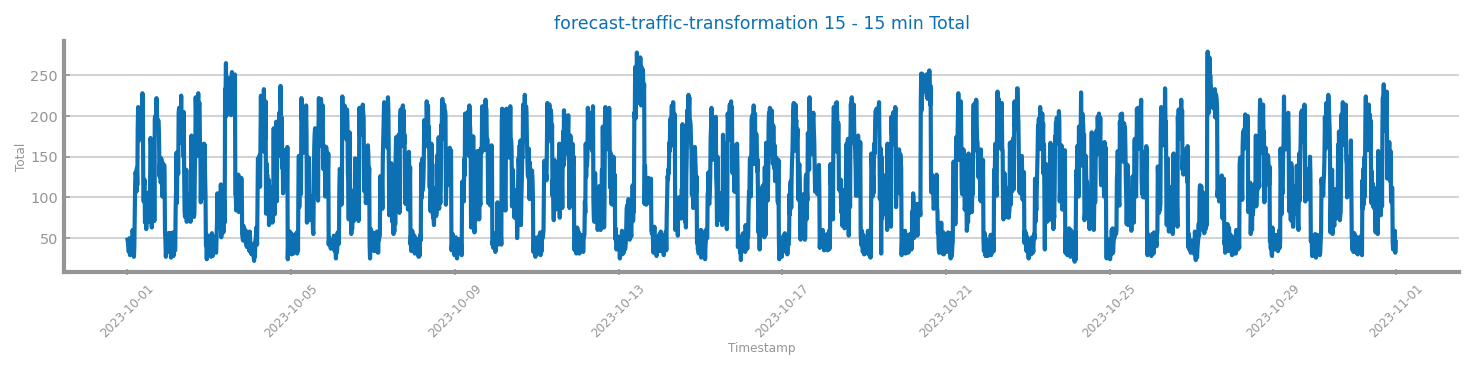

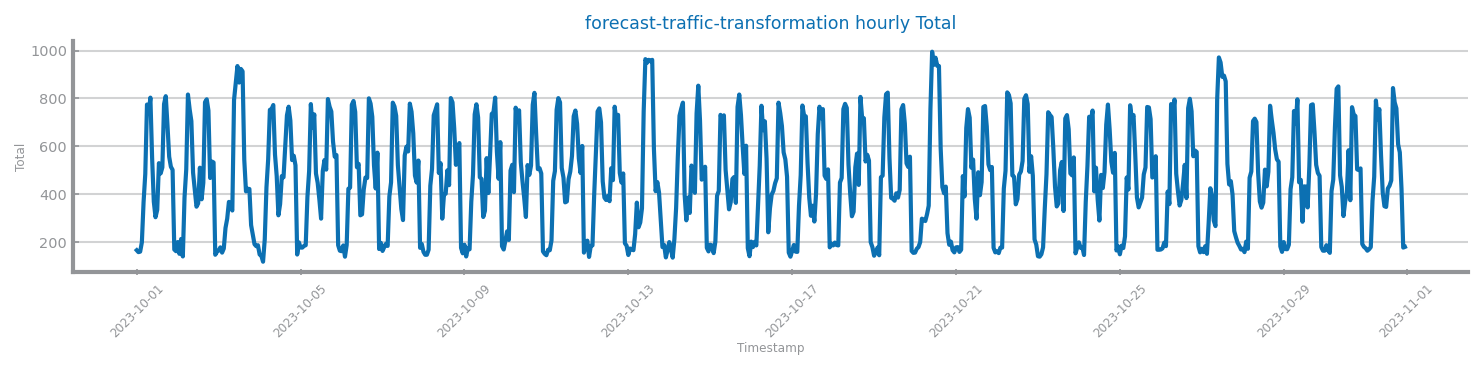

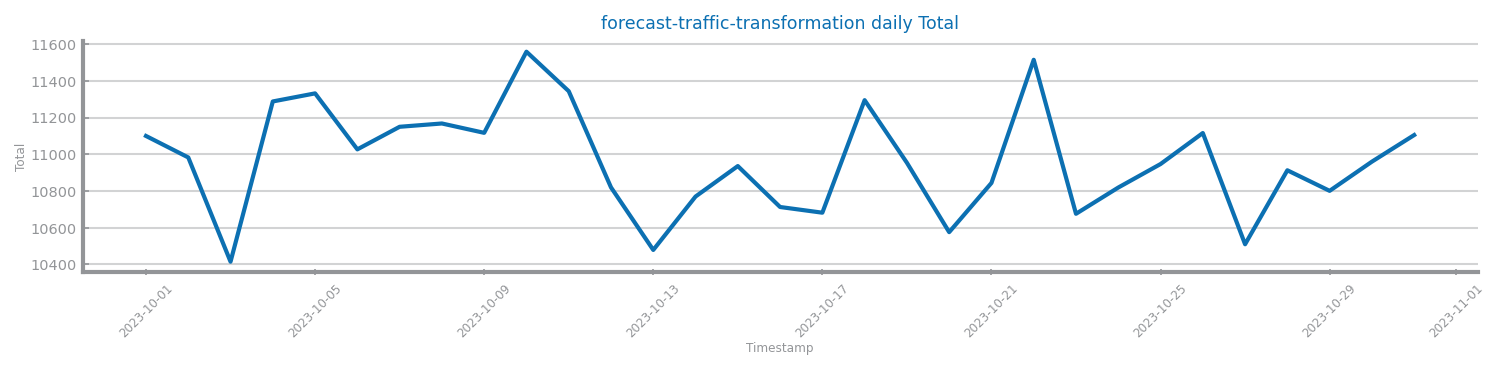

In [38]:
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} 15 - 15 min {target}",
)
savefig(f"images/forecast/{file_tag}_agg_total.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_h: Series = ts_aggregation_by(series, gran_level="H", agg_func="sum")
ss_agg_h_df: DataFrame = ts_aggregation_by(data, gran_level="H", agg_func="sum")

plot_line_chart(
    ss_agg_h.index.to_list(),
    ss_agg_h.to_list(),
    xlabel=ss_agg_h.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)

savefig(f"images/forecast/{file_tag}_agg_hourly.png")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg_d: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")
ss_agg_d_df: DataFrame = ts_aggregation_by(data, gran_level="D", agg_func="sum")
plot_line_chart(
    ss_agg_d.index.to_list(),
    ss_agg_d.to_list(),
    xlabel=ss_agg_d.index.name,
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
savefig(f"images/forecast/{file_tag}_agg_daily.png")
show()

Linear Regression Aggregation

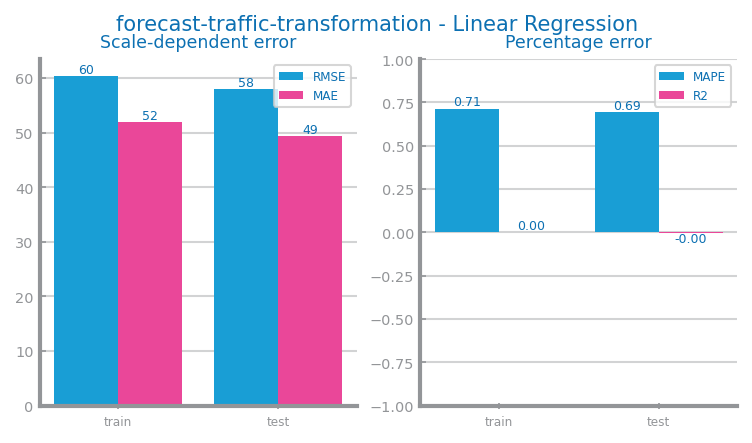

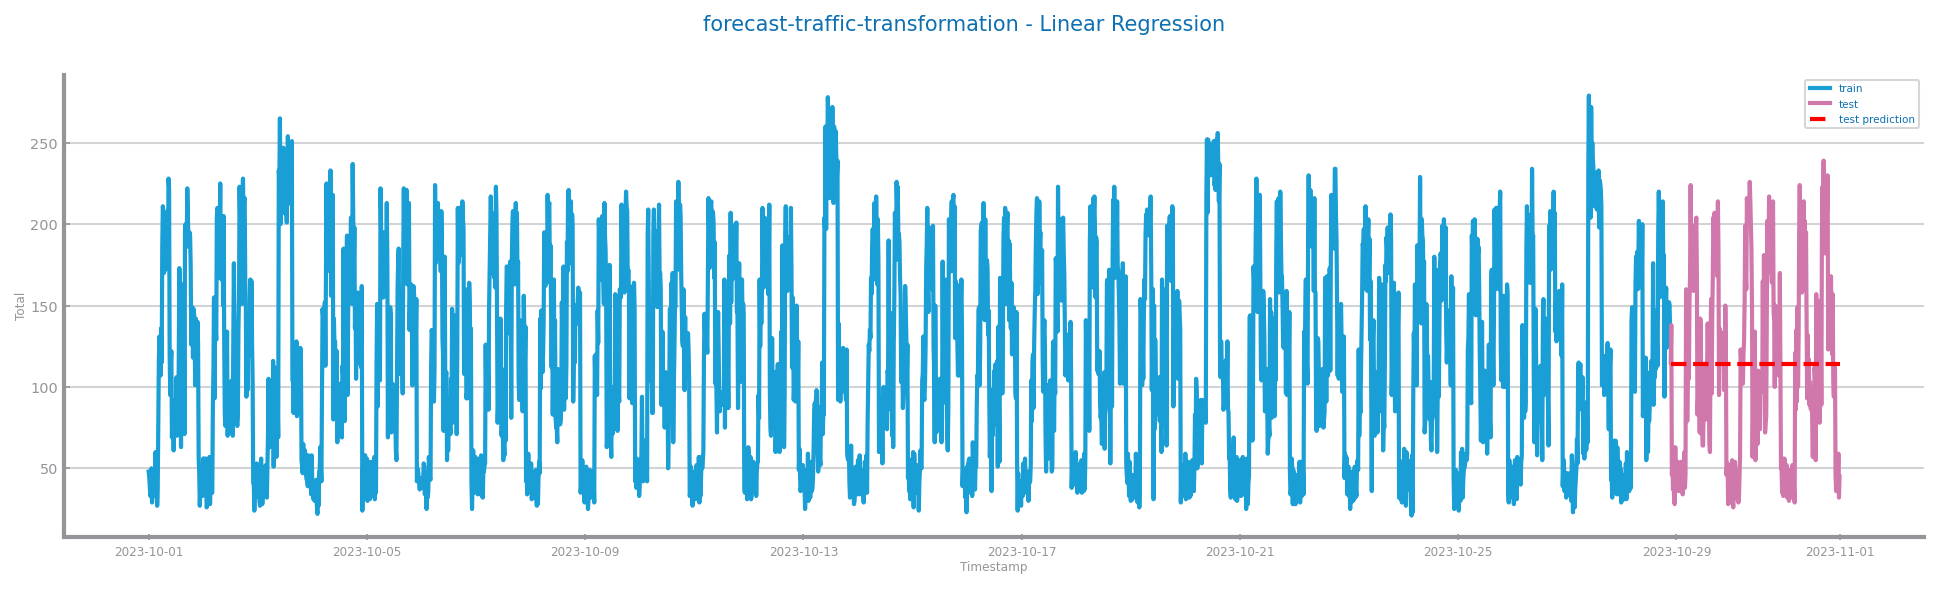

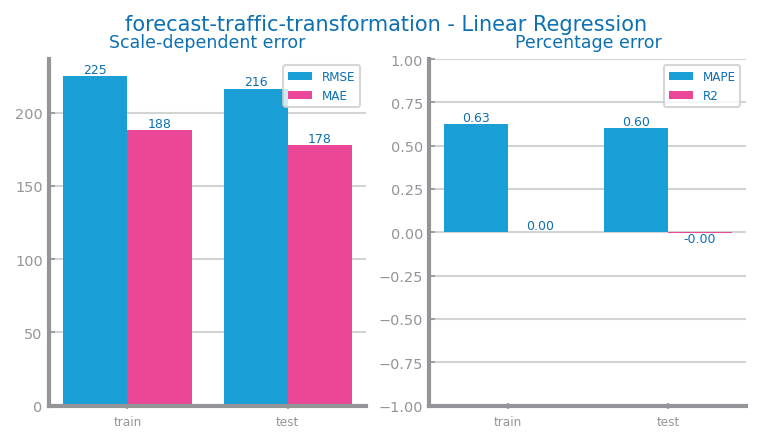

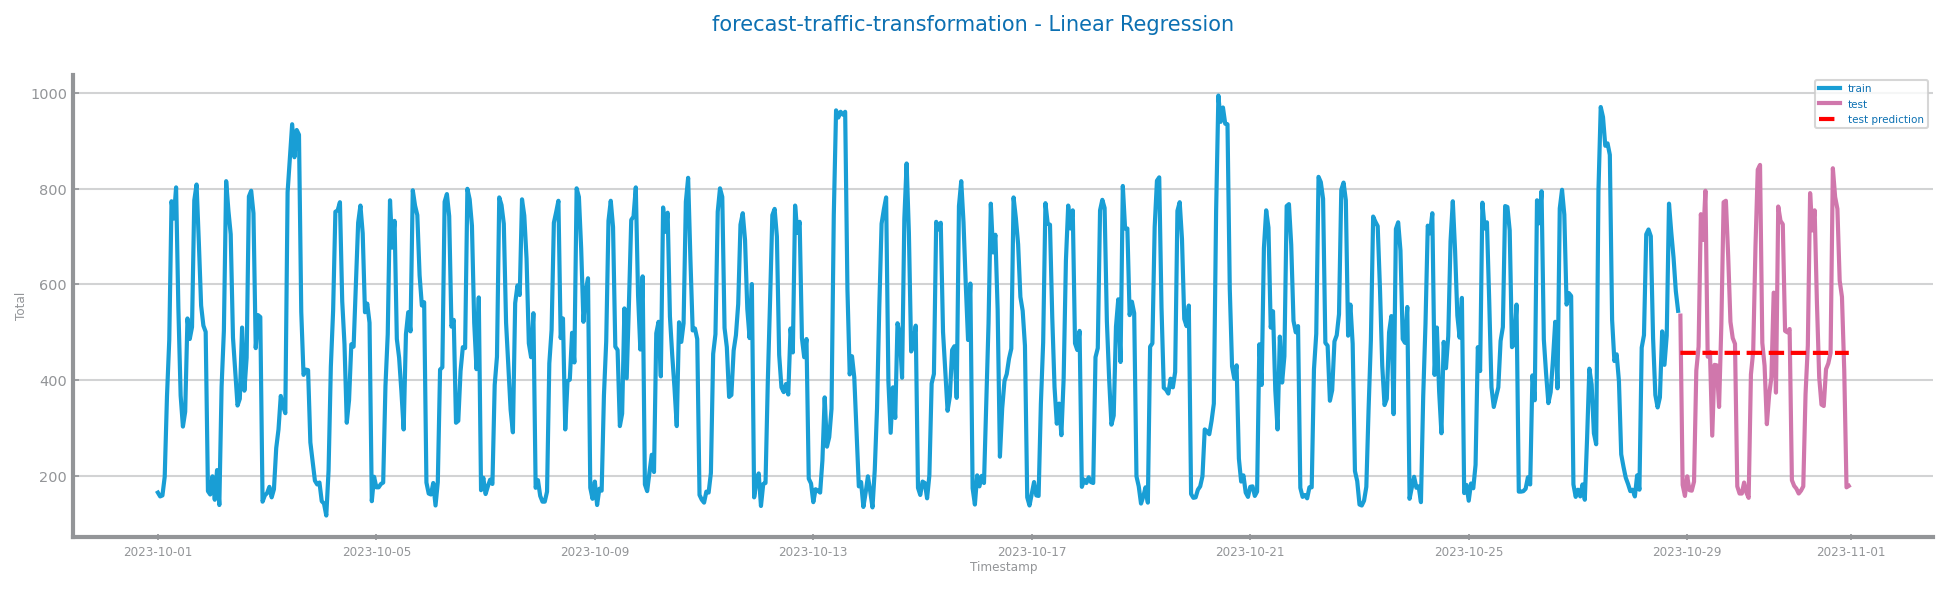

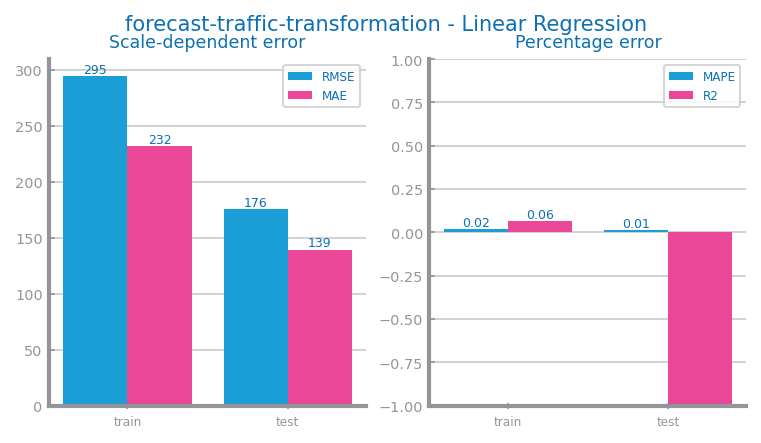

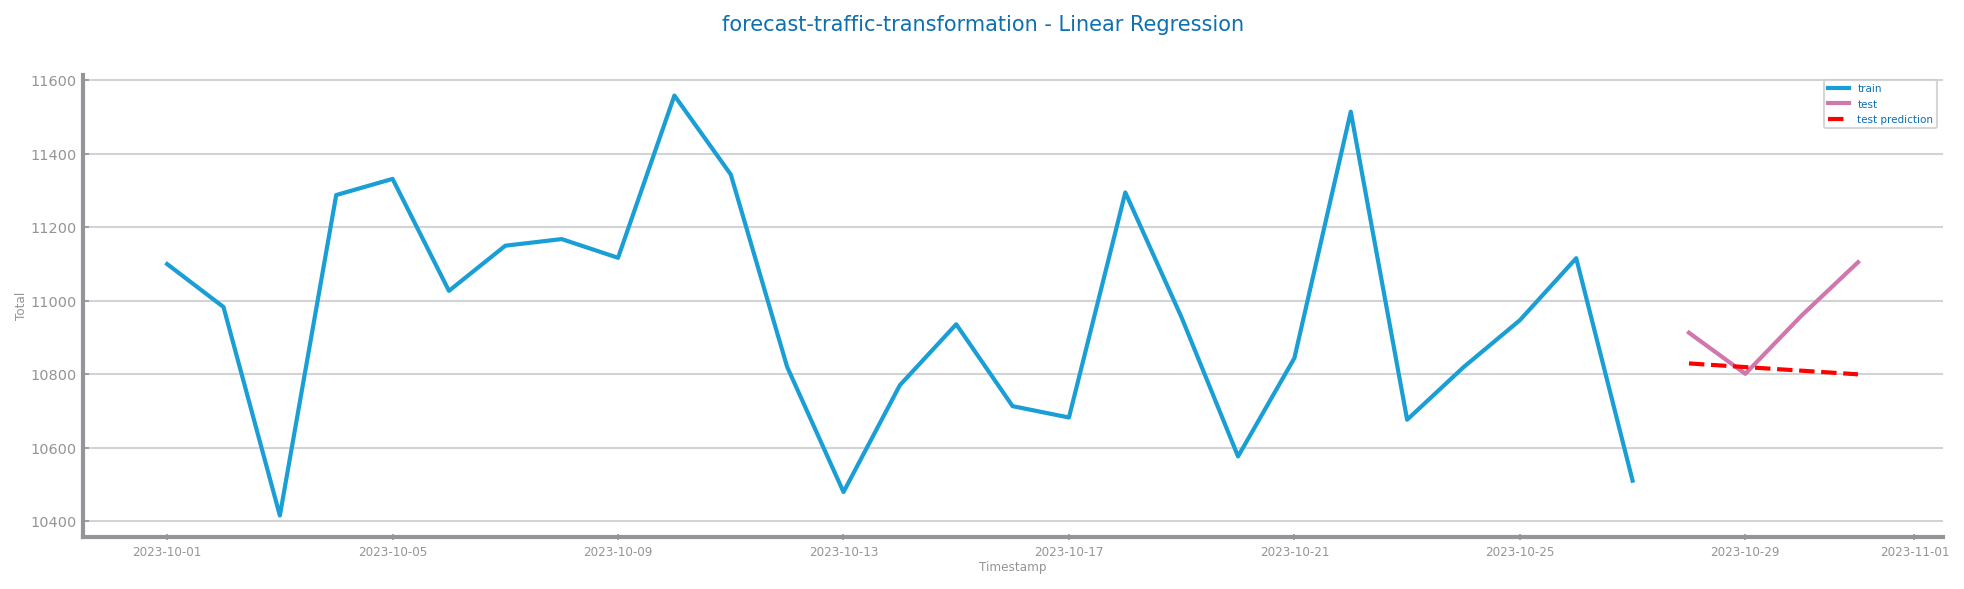

In [39]:
lst = [data, ss_agg_h_df, ss_agg_d_df]
for d in lst:
    train, test = series_train_test_split(d, trn_pct=0.90)

    trnX = arange(len(train)).reshape(-1, 1)
    trnY = train.to_numpy()
    tstX = arange(len(train), len(d)).reshape(-1, 1)
    tstY = test.to_numpy()

    model = LinearRegression()
    model.fit(trnX, trnY)

    prd_trn: Series = Series(model.predict(trnX), index=train.index)
    prd_tst: Series = Series(model.predict(tstX), index=test.index)

    plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Linear Regression")
    savefig(f"images/forecast/{file_tag}_linear_regression_eval.png")

    from dslabs_functions import plot_forecasting_series

    plot_forecasting_series(
        train,
        test,
        prd_tst,
        title=f"{file_tag} - Linear Regression",
        xlabel=index,
        ylabel=target,
    )
    savefig(f"images/forecast/{file_tag}_linear_regression_forecast.png")


SMOOTHING